<a href="https://colab.research.google.com/github/kdj0712/study_data_analytics/blob/main/docs/quests/EDAs/EDA_ShoppingMallDeliveryWithDate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df_SDM = pd.read_csv("/content/ShoppingMallDeliveryWithDate(3).csv")
df_SDM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   결제수단    46749 non-null  object 
 1   배송번호    46749 non-null  object 
 2   배송시작일   46749 non-null  object 
 3   배송완료일   46749 non-null  object 
 4   상품구매금액  46749 non-null  int64  
 5   상품번호    46661 non-null  float64
 6   수량      46749 non-null  int64  
 7   주문경로    46749 non-null  object 
 8   주문일     46749 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [12]:
df_SDM['배송시작일']

0         2019-01-07 오전 8:56
1         2019-01-03 오전 9:30
2         2019-01-03 오전 9:30
3         2019-01-03 오전 9:30
4         2019-01-07 오전 8:56
                ...         
46744     2017-12-29 오후 4:32
46745     2018-01-03 오전 9:45
46746     2018-01-02 오후 7:06
46747     2018-01-03 오후 2:00
46748    2018-01-03 오후 12:43
Name: 배송시작일, Length: 46749, dtype: object

In [14]:
def convert_time(x):
    date, ampm, time = x.split()
    if ampm == "오후" and time != "12:00":
        hour, minute = map(int, time.split(":"))
        time = f"{hour+12 if hour != 12 else hour}:{minute}"
    return pd.to_datetime(f"{date} {time}", format="%Y-%m-%d %H:%M")

df_SDM['배송시작일_datetime'] = df_SDM['배송시작일'].apply(convert_time)

In [15]:
def convert_time(x):
    date, ampm, time = x.split()
    if ampm == "오후" and time != "12:00":
        hour, minute = map(int, time.split(":"))
        time = f"{hour+12 if hour != 12 else hour}:{minute}"
    return pd.to_datetime(f"{date} {time}", format="%Y-%m-%d %H:%M")

df_SDM['배송완료일_datetime'] = df_SDM['배송완료일'].apply(convert_time)

In [16]:
df_SDM['배송소요일'] =df_SDM['배송완료일_datetime'] - df_SDM['배송시작일_datetime']

In [17]:
df_SDM['배송소요일'].value_counts()

3 days 10:59:00     928
3 days 20:31:00     769
3 days 11:00:00     740
3 days 10:58:00     723
3 days 19:39:00     678
                   ... 
10 days 15:14:00      1
3 days 06:36:00       1
11 days 16:44:00      1
4 days 01:28:00       1
8 days 07:40:00       1
Name: 배송소요일, Length: 2369, dtype: int64

In [9]:
df_SDM['상품번호'].value_counts()

455.0     1700
1237.0    1577
1374.0    1486
1209.0    1457
1373.0    1453
          ... 
1504.0       1
1208.0       1
1241.0       1
1461.0       1
333.0        1
Name: 상품번호, Length: 648, dtype: int64

<Axes: xlabel='상품번호'>

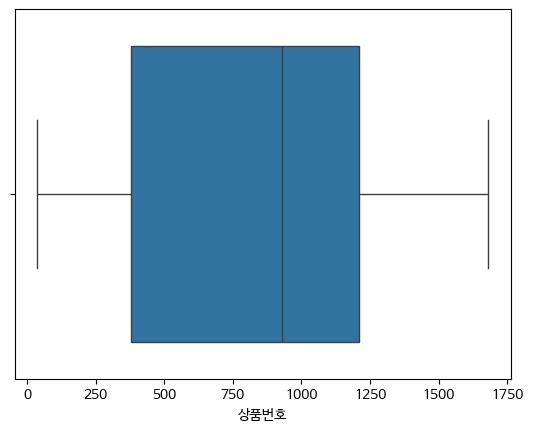

In [18]:
sns.boxplot(data=df_SDM, x='상품번호')

ValueError: Could not interpret value `상품번호` for `x`. Value is a string, but `data` was not passed.

In [19]:
df_SDM['상품번호'].describe()

count    46661.000000
mean       763.193073
std        456.323734
min         38.000000
25%        378.000000
50%        928.000000
75%       1209.000000
max       1681.000000
Name: 상품번호, dtype: float64

In [25]:
df_SDM_1 = df_SDM.query('상품번호 ==455.0')
df_SDM_1['배송소요일'].describe()

count                         1700
mean     3 days 18:06:20.294117647
std      1 days 00:42:32.119770610
min                0 days 00:00:00
25%                3 days 11:00:00
50%                3 days 12:03:00
75%                3 days 19:39:00
max               27 days 06:41:00
Name: 배송소요일, dtype: object

In [ ]:
df_SDM_1['배송소요일'].unique()

In [34]:
df_SDM_1['배송소요일_hours'] = df_SDM_1['배송소요일'].dt.total_seconds() / 3600

<ipython-input-34-d30c6bd965ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SDM_1['배송소요일_hours'] = df_SDM_1['배송소요일'].dt.total_seconds() / 3600


In [37]:
df_SDM_1['배송소요일_hours'].describe()

count    1700.000000
mean       90.105637
std        24.708922
min         0.000000
25%        83.000000
50%        84.050000
75%        91.650000
max       654.683333
Name: 배송소요일_hours, dtype: float64

In [ ]:
bins = np.arange(0, 1000, 12)  # 12시간 간격으로 묶음
labels = ["0~12시간", "13~24시간", "25~36시간", "37~48시간", "49~60시간", "70대", "80대"]
df_lcoct1['age_group'] = pd.cut(df_lcoct1['age'], bins,labels=labels,right=False)
df_lcoct1_1 = df_lcoct1.query('state != "계약확정"')
df_lcoct1_1.info()

제안 3: 배송 지연 요인 분석

문제 정의: 배송 지연의 주요 요인을 식별하고 이에 대한 해결책을 도출합니다.

배경: 배송 지연은 고객 불만의 주요 원인이 될 수 있으므로, 이를 최소화하기 위한 조치가 필요합니다.
